In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from random import randint
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from scipy import stats
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

In [2]:
BUCKET_NAME = "agriculture-bucket-gl"
SITE_ID = "US-Skr"

base_path = "gs://" + BUCKET_NAME  + "/Data sets/"
site_path = os.path.join(base_path, SITE_ID + "/")

common_path = os.path.join(base_path, "Common/")

ameriflux_data_path = base_path + "Ameriflux/Daily/"
ameriflux_stats_path = base_path + "Ameriflux/Stats/"

eeflux_data_path = base_path + "EEflux/Weekly/"
eeflux_stats_path = base_path + "EEflux/Stats/"

In [3]:
def get_ameriflux_df(site_id):
    path = os.path.join(ameriflux_data_path + "Filtered_" + site_id + ".xlsx")
    df = pd.read_excel(path, sheet_name="Sheet1")
#     path = os.path.join(ameriflux_data_path + site_id + "_Ameriflux_Daily.csv")
#     df = pd.read_csv(path)
    df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], format="%m/%d/%Y")
#     df = df[['TIMESTAMP','LE']]
    return df

def get_eeflux_df(site_id):
    path = os.path.join(eeflux_data_path + site_id + "_EEflux.csv")
    df = pd.read_csv(path)
    df['ETA'] = df['ETA'].replace(np.nan, 0)
    df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")
    df = df[['Date','Cloud', 'ETA']]
    return df    

ameriflux_df = get_ameriflux_df(SITE_ID)

eeflux_df = get_eeflux_df(SITE_ID)

In [4]:
eeflux_df

Date  Cloud       ETA
0    2004-01-07   64.0  6.368388
1    2004-01-07   62.0  6.190821
2    2004-01-15    1.0  4.134703
3    2004-01-15   43.0  2.334100
4    2004-01-23    0.0  4.231274
...         ...    ...       ...
1444        NaT    NaN  0.000000
1445        NaT    NaN  0.000000
1446        NaT    NaN  0.000000
1447        NaT    NaN  0.000000
1448        NaT    NaN  0.000000

[1449 rows x 3 columns]

In [5]:
merged_df = pd.merge(eeflux_df, ameriflux_df, left_on="Date", right_on="TIMESTAMP", how="inner")
merged_df

Date  Cloud        ETA  TIMESTAMP      NETRAD          P         RH  \
0  2006-11-04   99.0   0.000000 2006-11-04   51.854208 -9999.0000  74.115771   
1  2006-11-04   91.0   0.000000 2006-11-04   51.854208 -9999.0000  74.115771   
2  2006-11-20   96.0   0.000000 2006-11-20   29.473417 -9999.0000  69.756229   
3  2006-11-20   87.0   0.000000 2006-11-20   29.473417 -9999.0000  69.756229   
4  2006-11-28   16.0   0.000000 2006-11-28   64.539875 -9999.0000  77.886354   
5  2006-11-28   38.0   0.000000 2006-11-28   64.539875 -9999.0000  77.886354   
6  2006-12-06   30.0   0.000000 2006-12-06   62.769292 -9999.0000  76.718500   
7  2006-12-06   51.0   0.000000 2006-12-06   62.769292 -9999.0000  76.718500   
8  2007-02-24   22.0   1.820235 2007-02-24  126.172687 -9999.0000  76.936312   
9  2007-02-24   13.0   0.000000 2007-02-24  126.172687 -9999.0000  76.936312   
10 2007-04-29   13.0   0.000000 2007-04-29  206.423687 -9999.0000  77.178750   
11 2007-04-29    2.0   0.000000 2007-04-29  206.423687 -9999.0000  77.178750   
12 2007-05-07   44.0   0.000000 2007-05-07  193.009521 -9999.0000  72.470125   
13 2007-07-10   11.0   0.000000 2007-07-10  242.874646 -9999.0000  78.967583   
14 2007-07-10   14.0   0.000000 2007-07-10  242.874646 -9999.0000  78.967583   
15 2008-04-15   54.0   0.000000 2008-04-15  190.356313 -1874.8125  57.634000   
16 2008-04-15   12.0   0.000000 2008-04-15  190.356313 -1874.8125  57.634000   
17 2009-03-17   36.0   3.180450 2009-03-17  128.458521 -2708.0625  81.616583   
18 2009-03-17    6.0   4.279513 2009-03-17  128.458521 -2708.0625  81.616583   
19 2011-06-03   25.0  34.940220 2011-06-03  205.004417  -416.6250  69.719917   
20 2011-06-03   21.0  36.072899 2011-06-03  205.004417  -416.6250  69.719917   

           TA        WS         H2O          H          LE      Etmm  
0   21.560396  3.385875   21.026271 -40.347250  162.311271  5.608544  
1   21.560396  3.385875   21.026271 -40.347250  162.311271  5.608544  
2   12.732792  2.106771   11.883979   2.604542   54.177250  1.872054  
3   12.732792  2.106771   11.883979   2.604542   54.177250  1.872054  
4   20.160542  2.084417   20.181354  -5.042063   73.201521  2.529424  
5   20.160542  2.084417   20.181354  -5.042063   73.201521  2.529424  
6   19.316437  2.308187   19.464604 -10.749958  105.534667  3.646671  
7   19.316437  2.308187   19.464604 -10.749958  105.534667  3.646671  
8   19.268083  2.597542   17.190875  41.634458   72.599771  2.508631  
9   19.268083  2.597542   17.190875  41.634458   72.599771  2.508631  
10  24.336979  2.040375   23.457229  65.787437  133.929125  4.627820  
11  24.336979  2.040375   23.457229  65.787437  133.929125  4.627820  
12  22.456167  3.462604   18.257562  72.975958  209.874625  7.252060  
13  28.815313  2.336167 -590.123875  47.709792  168.988250  5.839262  
14  28.815313  2.336167 -590.123875  47.709792  168.988250  5.839262  
15  16.687583  3.423292   10.866979  92.107417  138.016687  4.769063  
16  16.687583  3.423292   10.866979  92.107417  138.016687  4.769063  
17  22.406792  1.594208   20.991813  39.991312   73.758646  2.548675  
18  22.406792  1.594208   20.991813  39.991312   73.758646  2.548675  
19  25.867146  2.580000   21.228813  49.829167  179.281625  6.194942  
20  25.867146  2.580000   21.228813  49.829167  179.281625  6.194942

In [7]:
def plot_ETa_ETm(df, year_number, showDiff = False, showRatio = False):
    fig, ax = plt.subplots(figsize=(15, 7))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    
    if showDiff:
        ax.plot(df["TIMESTAMP"], df["Difference"], "-o")
    elif showRatio:
        ax.plot(df["TIMESTAMP"], df["Ratio"], "-o")
    else:
        ax.plot(df["TIMESTAMP"], df["Etmm"], "-o")
        ax.plot(df["TIMESTAMP"], df["Modeled ET"], "-o")
        
    ax.set_xlabel('Weekly')
    ax.set_ylabel('ET')
    plt.title(SITE_ID + ':ETa vs ETm for year ' + year_number)
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

def stack_plot_ETa_ETm(df, ax, year_number, showDiff = False, showRatio = False):
    if showDiff:
        ax.plot(df["TIMESTAMP"], df["Difference"], "-o")
    elif showRatio:
        ax.plot(df["TIMESTAMP"], df["Ratio"], "-o")
    else:
        ax.plot(df["TIMESTAMP"], df["Etmm"], "-o")
        ax.plot(df["TIMESTAMP"], df["Modeled ET"], "-o")
    
#Convert time stamp to string, to match by only year string
time_stamp = []
ratio = []
diff = []
for i in range(merged_df.shape[0]):
    date = datetime.strptime(str(merged_df.iloc[i,0]), "%Y-%m-%d %H:%M:%S").strftime("%m/%d/%Y")
    time_stamp.append(date)
    ratio.append(merged_df.iloc[i, 4] / merged_df.iloc[i, 2])
    diff.append(merged_df.iloc[i, 4] - merged_df.iloc[i, 2])

merged_df["TIMESTAMP"] = time_stamp
# merged_df["Ratio"] = ratio
# merged_df["Difference"] = diff

merged_df.columns = ['Date', 'Cloud', 'EEflux ET', 'TIMESTAMP', 'NETRAD',
                     'P', 'RH', 'TA', 'WS', 'H2O', 'H', 'LE', 'Etmm'] 


/opt/conda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


In [8]:
#TODO: add the correct range for each site
years = range(2004, 2012)

def generate_all_years(year_list, showDiff = False, showRatio = False):
    index = 0
    fig, axs = plt.subplots(len(years), figsize=(15, 22)
                            ,sharex='col',sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0}) 
    for year in years:
        selected_year = str(year)
        ax = axs[index]
        df_year_sub = merged_df[merged_df['TIMESTAMP'].str.contains(selected_year)]
        stack_plot_ETa_ETm(df_year_sub, ax, selected_year, showDiff, showRatio)
        index +=1
        plt.xticks(rotation=90)
#         plt.legend()
        for ax in axs.flat:
            ax.set_xlabel('Weekly')
            ax.legend()
            ax.label_outer()
#             for label in ax.get_xticklabels():
#                 label.set_rotation(90)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

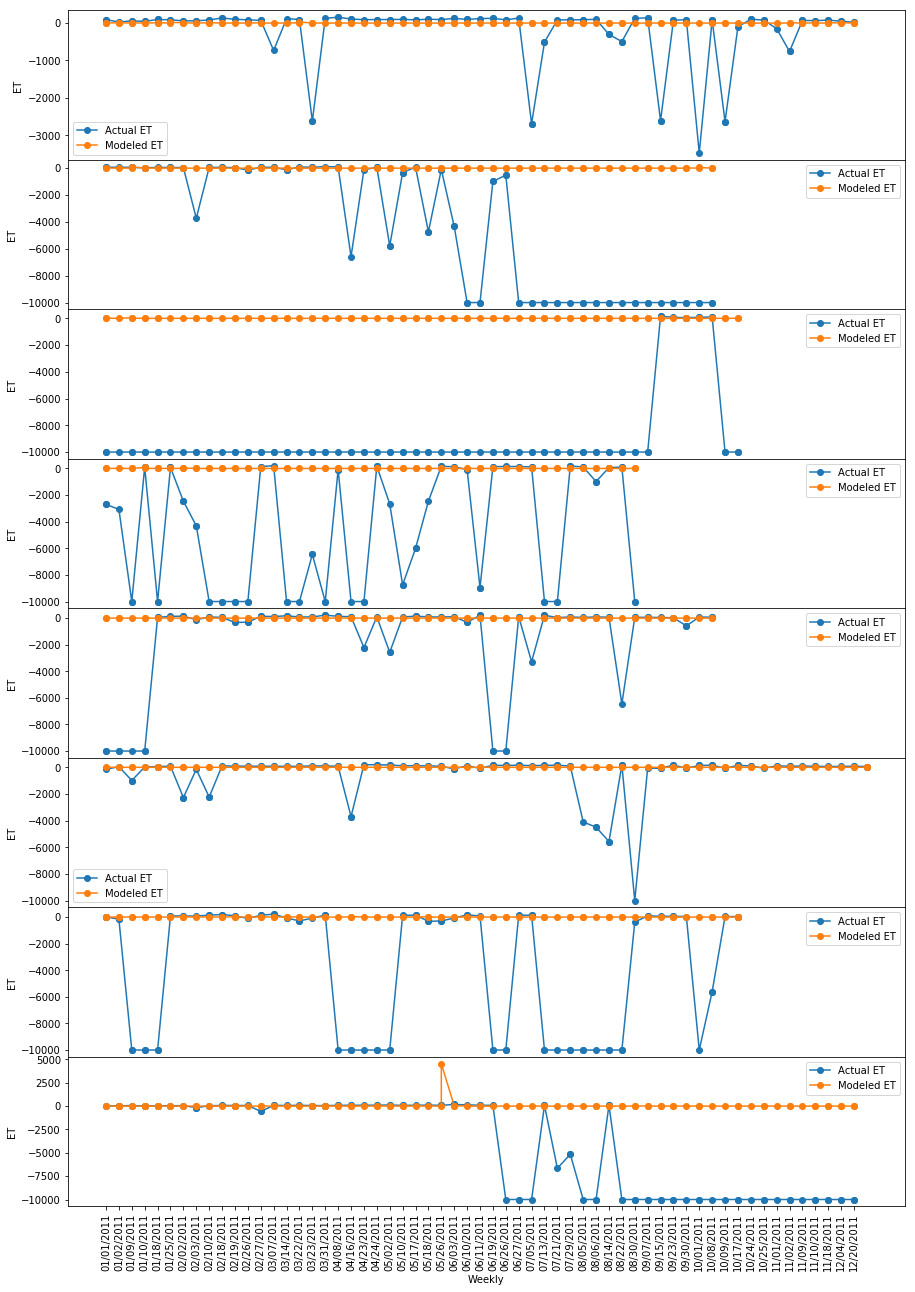

In [174]:
generate_all_years(years, showDiff = False, showRatio = False)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

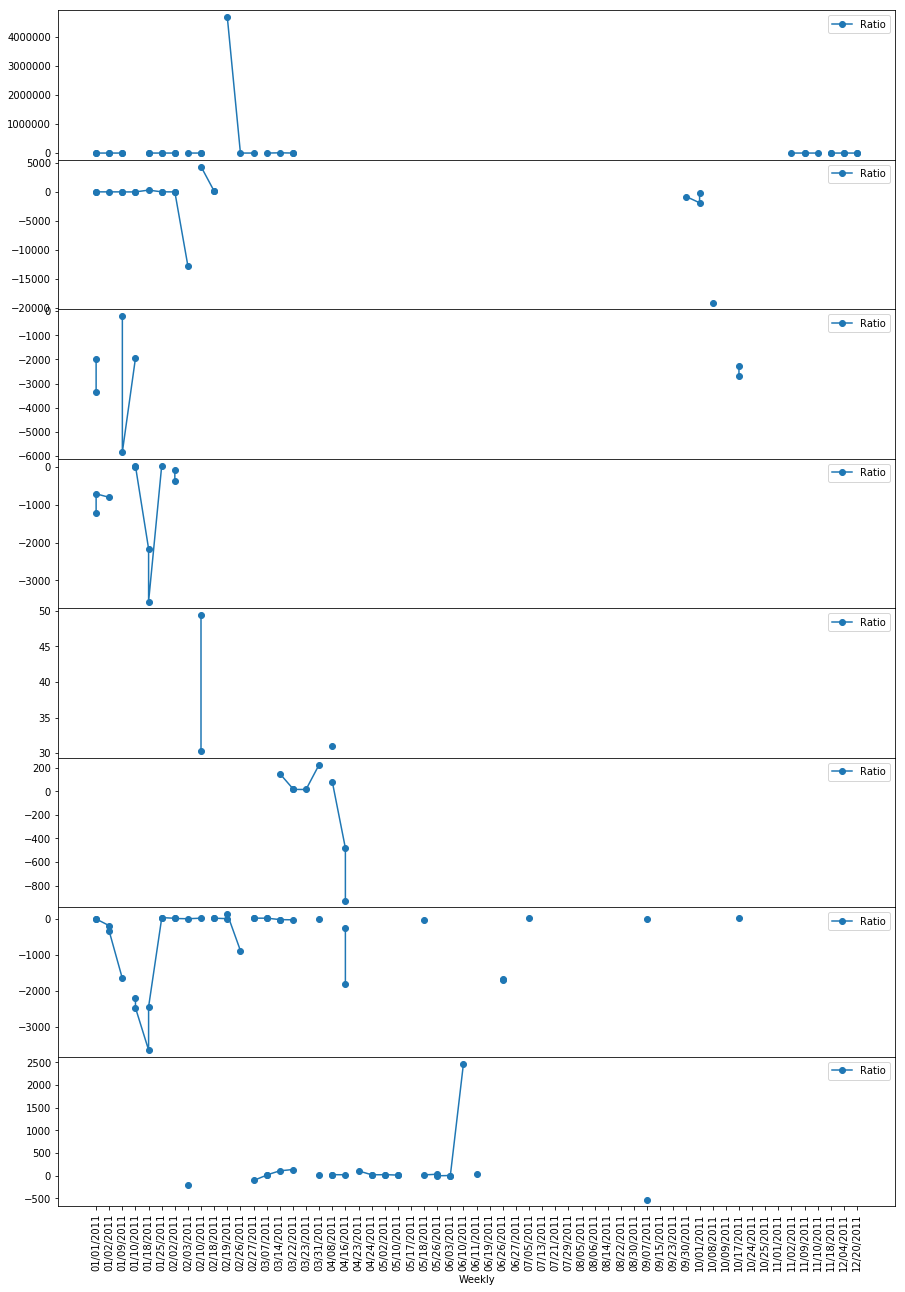

In [177]:
generate_all_years(years, showDiff = False, showRatio = True)

In [ ]:
generate_all_years(years, showDiff = True, showRatio = False)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [9]:
merged_df.head(30)

Date  Cloud  EEflux ET   TIMESTAMP      NETRAD          P         RH  \
0  2006-11-04   99.0   0.000000  11/04/2006   51.854208 -9999.0000  74.115771   
1  2006-11-04   91.0   0.000000  11/04/2006   51.854208 -9999.0000  74.115771   
2  2006-11-20   96.0   0.000000  11/20/2006   29.473417 -9999.0000  69.756229   
3  2006-11-20   87.0   0.000000  11/20/2006   29.473417 -9999.0000  69.756229   
4  2006-11-28   16.0   0.000000  11/28/2006   64.539875 -9999.0000  77.886354   
5  2006-11-28   38.0   0.000000  11/28/2006   64.539875 -9999.0000  77.886354   
6  2006-12-06   30.0   0.000000  12/06/2006   62.769292 -9999.0000  76.718500   
7  2006-12-06   51.0   0.000000  12/06/2006   62.769292 -9999.0000  76.718500   
8  2007-02-24   22.0   1.820235  02/24/2007  126.172687 -9999.0000  76.936312   
9  2007-02-24   13.0   0.000000  02/24/2007  126.172687 -9999.0000  76.936312   
10 2007-04-29   13.0   0.000000  04/29/2007  206.423687 -9999.0000  77.178750   
11 2007-04-29    2.0   0.000000  04/29/2007  206.423687 -9999.0000  77.178750   
12 2007-05-07   44.0   0.000000  05/07/2007  193.009521 -9999.0000  72.470125   
13 2007-07-10   11.0   0.000000  07/10/2007  242.874646 -9999.0000  78.967583   
14 2007-07-10   14.0   0.000000  07/10/2007  242.874646 -9999.0000  78.967583   
15 2008-04-15   54.0   0.000000  04/15/2008  190.356313 -1874.8125  57.634000   
16 2008-04-15   12.0   0.000000  04/15/2008  190.356313 -1874.8125  57.634000   
17 2009-03-17   36.0   3.180450  03/17/2009  128.458521 -2708.0625  81.616583   
18 2009-03-17    6.0   4.279513  03/17/2009  128.458521 -2708.0625  81.616583   
19 2011-06-03   25.0  34.940220  06/03/2011  205.004417  -416.6250  69.719917   
20 2011-06-03   21.0  36.072899  06/03/2011  205.004417  -416.6250  69.719917   

           TA        WS         H2O          H          LE      Etmm  
0   21.560396  3.385875   21.026271 -40.347250  162.311271  5.608544  
1   21.560396  3.385875   21.026271 -40.347250  162.311271  5.608544  
2   12.732792  2.106771   11.883979   2.604542   54.177250  1.872054  
3   12.732792  2.106771   11.883979   2.604542   54.177250  1.872054  
4   20.160542  2.084417   20.181354  -5.042063   73.201521  2.529424  
5   20.160542  2.084417   20.181354  -5.042063   73.201521  2.529424  
6   19.316437  2.308187   19.464604 -10.749958  105.534667  3.646671  
7   19.316437  2.308187   19.464604 -10.749958  105.534667  3.646671  
8   19.268083  2.597542   17.190875  41.634458   72.599771  2.508631  
9   19.268083  2.597542   17.190875  41.634458   72.599771  2.508631  
10  24.336979  2.040375   23.457229  65.787437  133.929125  4.627820  
11  24.336979  2.040375   23.457229  65.787437  133.929125  4.627820  
12  22.456167  3.462604   18.257562  72.975958  209.874625  7.252060  
13  28.815313  2.336167 -590.123875  47.709792  168.988250  5.839262  
14  28.815313  2.336167 -590.123875  47.709792  168.988250  5.839262  
15  16.687583  3.423292   10.866979  92.107417  138.016687  4.769063  
16  16.687583  3.423292   10.866979  92.107417  138.016687  4.769063  
17  22.406792  1.594208   20.991813  39.991312   73.758646  2.548675  
18  22.406792  1.594208   20.991813  39.991312   73.758646  2.548675  
19  25.867146  2.580000   21.228813  49.829167  179.281625  6.194942  
20  25.867146  2.580000   21.228813  49.829167  179.281625  6.194942

In [11]:
common_path_stats_both = os.path.join(common_path + SITE_ID + "_Filtered_Etmm_Merged.csv")
merged_df_both = merged_df.drop(['TIMESTAMP', 'Cloud'], 1)
merged_df_both.to_csv(common_path_stats_both,index = None, header=True)


# common_path_stats_both = os.path.join(common_path + SITE_ID + "_Filtered_Merged.csv")
# merged_df_both = merged_df.drop(['TIMESTAMP', 'Cloud'], 1)
# merged_df_both.to_csv(common_path_stats_both,index = None, header=True)


# common_path_stats_both = os.path.join(common_path + SITE_ID + "_Merged_Both.csv")
# merged_df_both = merged_df.drop(['TIMESTAMP', 'Cloud', 'Ratio', 'Difference'], 1)
# merged_df_both.to_csv(common_path_stats_both,index = None, header=True)


# common_path_stats_diff = os.path.join(common_path + SITE_ID + "_Merged_Diff.csv")
# merged_df_diff = merged_df.drop(['TIMESTAMP', 'Cloud', 'Ratio'], 1)
# merged_df_diff.to_csv(common_path_stats_diff,index = None, header=True)


# common_path_stats_ratio = os.path.join(common_path + SITE_ID + "_Merged_Ratio.csv")
# merged_df_ratio = merged_df.drop(['TIMESTAMP', 'Cloud', 'Difference'], 1)
# merged_df_ratio.to_csv(common_path_stats_ratio,index = None, header=True)

In [24]:
x = merged_df.drop(['TIMESTAMP', 'Ratio', 'Difference'], 1)
x.head()

<h3> Error Metrics </h3>

In [68]:
def get_error_metrics(y_true, y_predicted):
    r2_Score = r2_score(y_true, y_predicted)
    rmse_score = np.sqrt(mean_squared_error(y_true, y_predicted))
    mse_score = mean_squared_error(y_true, y_predicted)
    mae_score = mean_absolute_error(y_true, y_predicted)
    re_score = mse_score/np.mean(y_true) * 100
    
    def mean_absolute_percentage_error(y_true, y_pred):
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mape_score = mean_absolute_percentage_error(y_true, y_predicted)
#     print('\nTest metrics results:\nR2: %.2f\nRMSE: %.2f\nMSE: %.2f\nMAE: %.2f\nMAPE: %.2f\n' % (
#             r2_Score, rmse_score, mse_score, mae_score,
#             mape_score))
    return (r2_Score, rmse_score, mse_score, mae_score, re_score, mape_score)


r2:-0.55
mae: 3504.59
mse: 2591833.43
rmse: 5708.93
mape: NAN
re: 
    
    , 5708.9257683594915, 32591833.428639013, 3504.593023372016
print(get_error_metrics(merged_df[["Actual ET"]], merged_df[["Modeled ET"]]))

(-0.5523521883667915, 5708.9257683594915, 32591833.428639013, 3504.593023372016, Actual ET   -958519.14692
dtype: float64, Actual ET    NaN
Modeled ET   NaN
dtype: float64)


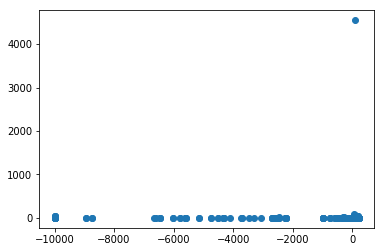

In [61]:
plt.scatter(merged_df[["Actual ET"]], merged_df[["Modeled ET"]])

In [62]:
corr, _ = spearmanr(merged_df[["Actual ET"]], merged_df[["Modeled ET"]])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.128


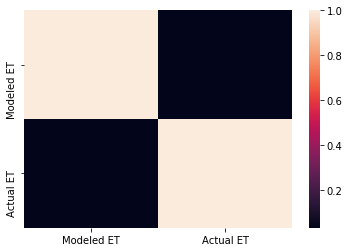

In [65]:
corr_df = merged_df.drop(['TIMESTAMP', 'Date', 'Cloud', 'Ratio', 'Difference'], 1)
corr = corr_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)